<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/DLlogosmall.png">

*This notebook contains an excerpt from the [Deep Learning with Tensorflow 2.0](https://www.adhiraiyan.org/DeepLearningWithTensorflow.html) by Mukesh Mithrakumar. The code is released under the [MIT license](https://opensource.org/licenses/MIT) and is available for FREE [on GitHub](https://github.com/adhiraiyan/DeepLearningWithTF2.0).*

*Open Source runs on love, laughter and a whole lot of coffee. Consider buying me [one](https://www.buymeacoffee.com/mmukesh) if you find this content useful!*



<!--NAVIGATION-->
< [03.00 - Probability and Information Theory](03.00-Probability-and-Information-Theory.ipynb) | [Contents](Index.ipynb) |

<a href="https://colab.research.google.com/github/adhiraiyan/DeepLearningWithTF2.0/blob/master/notebooks/04.00-Numerical-Computation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 04.00 - Numerical Computation

We now use computers for a  wide range of reasons, from watching movies to reading books to playing games, but originally computers were designed and used to solve computational problems. 

Numerical analysis or scientific computing is defines as the study of approximation techniques for numerically solving mathematical problems. 

__Numerical Computation__ is necessary for problem solving in that very few mathematical problems have a closed form solution. If an equation solves a given problem in terms of functions and mathematical operations from a given generally-accepted set in a finite number of standard operations, it is said to be closed form. But since most of the problems we deal in real life are non closed form, we use numerical methods to solve it. 

Linear equations, linear programming, optimization and numerical partial differential equations are main branches of numerical computation. These may sound far off from what you deal with in daily life so let me give you few examples, you know how plane ticket prices seem to go up whenever they want, that is an optimization problem, Google's page rank that ranks web pages is an eigenvector of a matrix of order about 3 billion, all these problems are solved using numerical computation. We will look at some of those methods in this chapter.

Optimization and solving systems of linear equations is at the heart of almost all machine learning and statistical techniques. These algorithms usually require a high amount of numerical computation. These evaluations can be difficult when the function involves real numbers, which can't be represented precisely using a finite amount of memory, which brings us to our first section.

In [1]:
# Imports

import tensorflow as tf
import tensorflow_probability as tfp

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# plt axis colors setup
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'text.color':'orange'})

# 04.01 - Overflow and Underflow

Representing infinitely many real numbers with a finite number of bit patterns represents a fundamental difficulty in performing continuous math on a digital computer. This means that for almost all real numbers we incur some approximation error in the form of rounding error. Rounding error is problematic when it compounds across many operations, and can cause algorithms that work in theory to fail in practice if they are not designed to minimize the accumulation of rounding error.


In [2]:
"""
In the same way, no matter how many base 2 digits you’re willing to use, the decimal value 0.1 cannot be represented 
exactly as a base 2 fraction. In base 2, 1/10 is the infinitely repeating fraction

0.0001100110011001100110011001100110011001100110011...

One illusion may beget another. For example, since 0.1 is not exactly 1/10, summing three values of 0.1 may not 
yield exactly 0.3, either:

Also, since the 0.1 cannot get any closer to the exact value of 1/10 and 0.3 cannot get any closer to the exact 
value of 3/10, then pre-rounding with round() function cannot help:

Though the numbers cannot be made closer to their intended exact values, the round() function can be useful for 
post-rounding so that results with inexact values become comparable to one another:

Binary floating-point arithmetic holds many surprises like this.
"""

x = 0.1
y = 0.2

print("x + y =  {}".format(x + y))
print("Rounded x + y: {}".format(round(x + y, 1)))
print("Check if .1 + .1 +.1 == .3: {}".format(1 + .1 + .1 == .3))
print("What if we pre round before adding: {}".format(round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1)))
print("What if we post round after adding: {}".format(round(.1 + .1 + .1, 10) == round(.3, 10)))

x + y =  0.30000000000000004
Rounded x + y: 0.3
Check if .1 + .1 +.1 == .3: False
What if we pre round before adding: False
What if we post round after adding: True


__Underflow__: occurs when numbers near zero are rounded to zero. This can be particularly devastating, think of division by zero, some software environments will raise an exception but other will result with a placeholder not a number value.

__Overflow__: occurs when numbers with large magnitude are approximated as $\infty$ or  $- \infty$.

One function that must be stabilized against underflow and overflow is the __softmax function__:

$$\color{orange}{\text{softmax}(x)_i = \frac{exp(x_j)}{\sum_{j=1}^n exp(x_j)} \tag{1}}$$

In [3]:
def softmax(x, solve=False):
    """Softmax implementation"""
    if solve:
        z = x-max(x)
    else:
        z = x
    numerator = tf.math.exp(z)
    denominator = tf.math.reduce_sum(numerator)
    
    return tf.divide(numerator, denominator)


# Underflow example
"""
If c is very negative, exp(c) will underflow, meaning the denominator will become 0
"""

underflow = tf.constant([-12345, -67890, -99999999], dtype=tf.float32)
print("Softmax Underflow {}".format(softmax(underflow, solve=False)))

# Overflow example
"""
When c is very large and positive, exp(c) will overflow and the expression ends up being undefined
"""

overflow = tf.constant([12345, 67890, 99999999], dtype=tf.float32)
print("Softmax Overflow {}".format(softmax(overflow, solve=False)))

# Solution
"""
Both of these can be solved by evaluating softmax(z) where z = x - max_i x_i.
This works because subtracting max results in the largest argument to exp being 0, getting rid of overflow
and atleast one term in the denominator has a value of 1, which gets rid of underflow

Compare the overflow and underflow examples
"""

underflow = tf.constant([-12345, -67890, -99999999], dtype=tf.float32)
print("Underflow Solved: {}".format(softmax(underflow, solve=True)))

overflow = tf.constant([12345, 67890, 99999999], dtype=tf.float32)
print("Overflow Solved: {}".format(softmax(overflow, solve=True)))


# compare the solution with the tensorflow softmax implementation
underflow_softmax_tf = tf.nn.softmax(underflow, axis=None)
overflow_softmax_tf = tf.nn.softmax(overflow, axis=None)

print("Tensorflow Softmax Underflow: {} \nTensorflow Softmax Overflow: {}".format(underflow_softmax_tf, overflow_softmax_tf))

Softmax Underflow [nan nan nan]
Softmax Overflow [nan nan nan]
Underflow Solved: [1. 0. 0.]
Overflow Solved: [0. 0. 1.]
Tensorflow Softmax Underflow: [1. 0. 0.] 
Tensorflow Softmax Overflow: [0. 0. 1.]


# 04.02 - Poor Conditioning

Conditioning refers to how rapidly a function changes with respect to small changes in its inputs. Functions that change rapidly when their inputs are perturbed slightly can be problematic for scientific computation because rounding errors in the inputs can result in large changes in the output.

For example, the function $f(x) = A^{-1}x$. When $A \in \mathbb{R}^{n \times n}$ has an eigenvalue decomposition, its __condition number__ is:

$$\color{orange}{max_{i, j} \Biggr | \frac{\lambda_i}{\lambda_j} \Biggr | \tag{2}}$$

This is the ratio of the magnitude of the largest and smallest eigenvalue. When this number is large, matrix inversion is particularly sensitive to error in the input.

This sensitivity is an intrinsic property of the matrix itself, not the result of rounding error during matrix inversion. Poorly conditioned matrices amplify pre-existing errors when we multiply by the true matrix inverse. In practice, the error will be compounded further by numerical errors in the inversion process itself.

In [4]:
A = tf.constant([[4.1, 2.8], [9.7, 6.6]], dtype=tf.float32)
b = tf.constant([[4.1], [9.7]], dtype=tf.float32)
print("Matrix A: \n{}\n".format(A))

# solve for x, from Ax=b, x = A^(-1) b
x = tf.linalg.matmul(tf.linalg.inv(A), b)
print("Value of x: \n{}\n".format(x))

# Now lets see what happens if we add 0.01 to the first component of b
b2 = tf.constant([[4.11], [9.7]], dtype=tf.float32)

# We can also use tf.linalg.solve to solve a systems of linear equations
x_solve = tf.linalg.solve(A, b2)
print("Solving for new x: \n{}".format(x_solve))
print("We can see how the solution changes dramatically for a small increase in value\n")

# let's now calculate the condition number for matrix A using ||A|| * ||A^-1||
condition_A = tf.math.multiply(tf.norm(A), tf.norm(tf.linalg.inv(A)))
print("Condition Number of A: {}".format(condition_A))


Matrix A: 
[[4.1 2.8]
 [9.7 6.6]]

Value of x: 
[[0.9999695]
 [0.       ]]

Solving for new x: 
[[0.34000078]
 [0.96999884]]
We can see how the solution changes dramatically for a small increase in value

Condition Number of A: 1622.9697265625


# 04.03 - Gradient-Based Optimization

Most deep learning algorithms involve optimization of some sort. Optimization refers to the task of either minimizing or maximizing some function $f(x)$ by altering $x$. We usually phrase most optimization problems in terms of minimizing $f(x)$. Maximization may be accomplished via a minimization algorithm by minimizing $-f(x)$.

The function we want to minimize or maximize is called the __objective function__ or __criterion__. When we are minimizing it, we may also call it the __cost function, loss function__, or __error function__.

We often denote the value that minimizes or maximizes a function with a superscript *. For example we might say $x^* = arg \ min \  f(x)$.



Suppose we have a function $y = f(x)$, where both _x_ and _y_ are real numbers. The __derivative__ of this function is denoted as $f^{'}(x)$ or as $\frac{dy}{dx}$. The derivative $f^{'}(x)$ gives the slope of $f(x)$ at the point _x_. In other words, it specifies how to scale a small change in the input to obtain the corresponding change in the output:

$$\color{orange}{f(x + \epsilon) \approx f(x) + \epsilon f^{'}(x) \tag{3}}$$

__Gradient descent__ is the technique of moving in small steps with the opposite sign of the derivative to reduce $f(x)$.


![Gradient descent](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403a.jpeg)


- When $f^{'}(x) = 0$, the derivative provides no information about which direction to move. These points are known as __critical points__, or __stationary points__.

- A __local minimum__ is a points where $f(x)$ is lower than all neighboring points, so it is no longer possible to decrease $f(x)$ by making infinitesimal steps.

- A __local maximum__ is a point where $f(x)$ is higher than all neighboring points, so it is not possible to increase $f(x)$ by making infinitesimal steps.

- Some critical points are neither maxima or minima, these are knows as __saddle points__.

- A point that obtains the absolute lowest value of $f(x)$ is a __global minimum__.

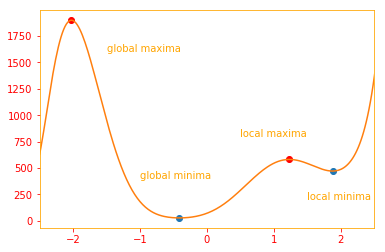

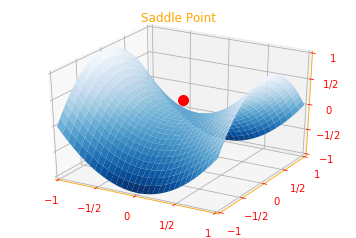

In [5]:
"""
Let's see how these look like by plotting these. Note that I am using numpy for these plots but we will start 
using tensorflow in the upcoming sections. Also, taking the derivatives and most optimizations are 
easily done with packages like numpy, scipy or sympy since these are dedicated scientific libraries
whereas tensorflow is a machine learning framework but I am working on bringing a scientific extension to the 
tensorflow, please see (https://github.com/mukeshmithrakumar/scientific). 
This is work in progress and contributions are welcome.

"""

polynomial = np.poly1d([2,-4,-28,62,122,-256,-196,140,392,240,72])             # Create a one-dimensional polynomial class
polynomial_root = polynomial.deriv().r                                         # Return a derivative of this polynomial with the roots
r_crit = polynomial_root[polynomial_root.imag==0].real                         # Return the real part of the complex argument
test = polynomial.deriv(2)(r_crit) 

# local minima 
x_min = r_crit[test>0]
y_min = polynomial(x_min)
plt.plot(x_min, y_min, 'o')
plt.text(1.5, 200, 'local minima')

# local maxima 
x_max = r_crit[test<0]
y_max = polynomial(x_max)
plt.plot(x_max, y_max, 'o', color='r')
plt.text(0.5, 800, 'local maxima')

#global maxima
plt.text(-1.5, 1600, 'global maxima')

# global minima 
xc = np.arange(-2.5, 2.6, 0.02)
yc = polynomial(xc)
plt.plot( xc, yc)
plt.xlim([-2.5,2.5])
plt.text(-1, 400, 'global minima')


# Saddle Point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_args = {'rstride': 1, 'cstride': 1, 'cmap':"Blues_r",
             'linewidth': 0.4, 'antialiased': True,
             'vmin': -1, 'vmax': 1}

x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2
ax.plot_surface(x, y, z, **plot_args)
ax.view_init(azim=-60, elev=30)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.xticks([-1, -0.5, 0, 0.5, 1], [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
plt.yticks([-1, -0.5, 0, 0.5, 1],[r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticklabels([r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
ax.scatter([0], [0], [.3], s=100, color = 'r', marker="o")
plt.title("Saddle Point")
plt.show()

In deep learning we often deal with multidimensional inputs with functions that may have many local minima that are not optimal and many saddle points surrounded by very flat regions. This makes optimization difficult, we therefore usually settle for finding a value of $f$ that is very low but not necessarily minimal in any formal sense.

For functions with multiple inputs, we must make use of the concept of __partial derivatives__. The partial derivative $\frac{\partial}{\partial  x_i} f(x)$ measures how $f$ changes as only the variable $x_i$ increases at point __x__. The __gradient__ generalizes the notion of derivative to the case where the derivative is with respect to a vector: the gradient of $f$ is the vector containing all the partial derivatives, denoted $\nabla_x f(x)$. Element $i$ of the gradient is the partial derivative of $f$ with respect to $x_i$.

In [6]:
"""
Lets say we have a function z = f(x, y) = 2x - y: The partial derivatives of this equation is:
dz_dx = 2, dz_dy = -1. Let's see how we can calculate this in tensorflow using GradientTape.

GradientTape records operations for automatic differentiation and we use it with persistent=True 
to allow multiple calls to the gradient(). Note that since we are using constants, we need to 
ensure that these are being traced when we do the GradientTape, hence we use a watch method.
But when we start working with variables, we don't need to have a watch.
"""

x = tf.constant(1.0)
y = tf.constant(2.0)

with tf.GradientTape(persistent=True) as g:
    g.watch(y)
    g.watch(x)
    out = tf.subtract(2*x, y)
dz_dx = g.gradient(out, x)
dz_dy = g.gradient(out, y)
del g  # Drop the reference to the tape

print("Partial Derivative of dz_dx: {} \nPartial Derivative of dz_dy: {} ".format(dz_dx, dz_dy))

Partial Derivative of dz_dx: 2.0 
Partial Derivative of dz_dy: -1.0 


The __directional derivative__ in direction $u$ (a unit vector) is the slope of the function $f$ in direction $u$. In other words, the directional derivative is the derivative of the function $f(x + \alpha u)$ with respect to $\alpha$, evaluated at $\alpha = 0$. Using the chain rule, we can see that $\frac{\partial}{\partial \alpha} f(x + \alpha u)$ evaluates to $u^{\top} \nabla_x f(x)$ when $\alpha = 0$.

To minimize $f$, we would like to find the direction in which $f$ decreases the fastest. We can do this using the directional derivative:

$$\color{orange}{min_{u, u^{\top} \ u=1} u^{\top} \nabla_x f(x) \tag{4}}$$

$$\color{orange}{=min_{u, u^{\top} \ u=1} \|u\|_2 \ \| \nabla_x f(x) \|_2 \ cos \theta  \tag{5}}$$

where $\theta$ is the angle between $u$ and the gradient. Substituting in $\|u\|_2 = 1$ and ignoring factors that do not depend on $u$, this simplifies to $min_u cos \theta$. This is minimized when $u$ points in the opposite direction as the gradient. in other words, the gradient points directly uphill, and the negative gradient points directly downhill. We can decrease $f$ by moving in the direction of the negative gradient. This is known as the __method of steepest descent__ or __gradient descent__.


Well, if you take away all the math, gradient descent simply states that if you move in the opposite direction of a functions gradient, you will be able to decrease it. Think about it this way, if you have climbed a mountain and you want to hike down, you know the fastest way down is from the way the mountain is steepest right. If you have skied, one of the fastest ways to reach the bottom is by skiing from the steepest parts. This is exactly what we do, we find the steepest part and then move in the opposite direction.


Steepest descent proposes a new point:

$$\color{orange}{x^{'} = x - \epsilon \nabla_x f(x) \tag{6}}$$

where $\epsilon$ is the __learning rate__, a positive scalar determining the size of the step.

Starting x value: 1.0
Iteration: 0 x: 0.6618226766586304
Iteration: 5 x: -0.38608601689338684
Iteration: 10 x: -0.691019594669342
Iteration: 15 x: -0.7591084837913513
Iteration: 20 x: -0.7734286189079285
Iteration: 25 x: -0.776404082775116
Iteration: 30 x: -0.7770206928253174
Iteration: 35 x: -0.777148425579071
Iteration: 40 x: -0.7771749496459961


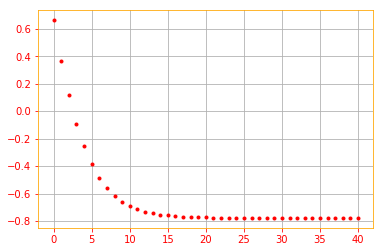

In [7]:
"""
f(x,y) = x^2 + y^2 + xsiny + ysinx
f'(x, y) = (2 x + y cos(x) + sin(y)) dx + (2 y + x cos(y) + sin(x)) dy

If you know chain rule, this can be easily differentiated but if you don't, you don't have to worry, tensorflow
will take care of any kind of function for you using Gradient Tape

"""
def f(x, y):
    return tf.pow(x, 2) + tf.pow(y, 2) + tf.multiply(x, tf.math.sin(y)) + tf.multiply(y, tf.math.sin(x))

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)


a = 0.1 # learning rate
x0 = tf.constant(1.0)
y0 = tf.constant(1.0) 
print("Starting x value: {}".format(x0))

update = []
for i in range(41):
    x0 -= a * grad(x0, y0)
    update.append(x0)
    plt.plot(i, update[-1], color='r', marker='.')
    if i%5 == 0:
        print("Iteration: {} x: {}".format(i, x0))
plt.grid()

Below is an animation of how our gradient takes small steps and finds the global minimum.

![Gradient descent with tensorflow](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403b.gif)

In some cases, we may be able to avoid running this iterative algorithm and just jump directly to the critical point by solving the equation $\nabla_x f(x) = 0$ for $x$.

Although gradient descent is limited to optimization in continuous spaces, the general concept of repeatedly making a small move (that is approximately the best small move) toward better configurations can be generalized to discrete spaces. Ascending an objective function of discrete parameters is called __hill climbing__.

Haha, I had to put this, the perfect analogy for gradient descent would be have you seen these videos where people roll down the hill, 

![Gradient descent example](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403c.jpg)

Gradient descent is exactly that, not everyone reaches the bottom (global minimum), they get stuck in pits (local minimum), where you start from the top (initial values) plays a huge part in the path you take and how fast you roll down (learning rate) determines how fast you reach the bottom and if you could potentially jump out of the pits. If you haven't watched these videos, take a look at [this](https://www.youtube.com/watch?v=fiaWyG7iKes) btw, that is just crazy.

## 4.3.1 Beyond the Gradient: Jacobian and Hessian Matrices

Suppose we need to find all the partial derivatives of a function whose input and output are both vectors. The matrix containing all such partial derivatives is known as a __Jacobian matrix__. Specifically, if we have a function $f : \mathbb{R}^m \rightarrow \mathbb{R}^n$, then the Jacobian matrix $J \in \mathbb{R}^{n \times m}$ of $f$ is defined such that $J_{i, j} = \frac{\partial}{\partial x_j} f(x)$.

In [8]:
"""
Using Tensorflow GradientTape, we can easily find the Jacobian of any vector using "jacobian(target, sources)".
In this example for f(x) = x^2 we will look at the Jacobian when x = [1.0, 2.0]
"""

with tf.GradientTape() as g:
    x  = tf.constant([1.0, 2.0])
    g.watch(x)
    y = x * x
jacobian = g.jacobian(y, x)

print("Jacobian \n{}".format(jacobian))
del g  # Drop the reference to the tape

Jacobian 
[[2. 0.]
 [0. 4.]]


We are also sometimes interested in a derivative of a derivative. This is known
as a second derivative. For example, for a function  $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the derivative with respect to $x_i$ of the derivative of $f$ with respect to $x_j$ is denoted as $\frac{\partial^2}{\partial x_i \partial x_j} f$. In a single dimension we denote $\frac{d^2}{dx^2} f$ by $f^{''}(x)$. The second derivative tells
us how the first derivative will change as we vary the input. This is important because it tells us whether a gradient step will cause as much of an improvement as we would expect based on the gradient alone. We can think of the second derivative as measuring __curvature__. 

In [9]:
"""
We will use tf.GradientTape() to calculate the second derivative of the function 
f(x) = x^3
f'(x) = 3x^2
f''(x) = 6x
"""

x = tf.Variable(1.0)

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

print("First Derivative of f(x): {} \nSecond Derivative of f(x): {}".format(dy_dx, d2y_dx2))
del t, t2  # Drop the reference to the tape

First Derivative of f(x): 3.0 
Second Derivative of f(x): 6.0


Below is a plot of our function f(x) = x^3, f'(x) = 3x^2 and f''(x)=6x:

![First and second derivative plot](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403d.png)


The second derivative can be used to determine whether a critical point is
a local maximum, a local minimum, or a saddle point. 

- When $f^{'}(x) = 0$ and $f^{''}(x) > 0$, we can conclude that $x$ is a local minimum.

- When $f^{'}(x) = 0$ and $f^{''}(x) < 0$, we can conclude that $x$ is a local maximum.

- If $f^{''}(x) = 0$ then $x$ may be a saddle point or a part of a flat region.


- If the second derivative is zero, then there is no curvature. It is a perfectly flat line, and its value can be predicted using only the gradient. If the gradient is 1, then we can make a step of size $\epsilon$ along the negative gradient, and the cost function will decrease by $\epsilon$. 


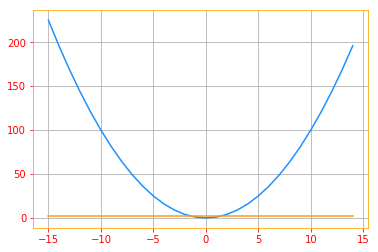

In [10]:
# Plot where second derivative is zero

x0 = tf.range(-15., 15., 1.)
x = tf.Variable(x0)

def f(x): 
    return tf.pow(x, 2)

def second_derivative(x):
    """
    Note here since x is a variable we are not calling the watch method. 
    Since we are taking the second derivative, we need to call the GradientTape twice and use the 
    gradient() method to obtain the gradients.
    """
    with tf.GradientTape() as t:
        with tf.GradientTape() as t2:
            out = f(x)
        dy_dx = t2.gradient(out, x)
    d2y_dx2 = t.gradient(dy_dx, x)
    return d2y_dx2

# Original Function f(x) = x^2
plt.plot(x0, f(x0), color='dodgerblue')

# Second Derivative of f(x)
d2 = second_derivative(x)
plt.plot(x0, d2, color='#FF9A13')
plt.grid()


- If the second derivative is negative, the function curves downward, so the cost function will actually decrease by more than $\epsilon$.

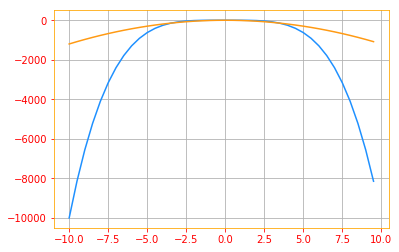

In [11]:
# Plot where second derivative is negative

x0 = tf.range(-10., 10., .5)
x = tf.Variable(x0)

def f(x): 
    return -(tf.pow(x, 4))

def second_derivative(x):
    with tf.GradientTape() as t:
        with tf.GradientTape() as t2:
            out = f(x)
        dy_dx = t2.gradient(out, x)
    d2y_dx2 = t.gradient(dy_dx, x)
    return d2y_dx2

# Original Function f(x): -x^4
plt.plot(x0, f(x0), color='dodgerblue')

# Second Derivative of f(x)
d3 = second_derivative(x)
plt.plot(x0, d3, color='#FF9A13')
plt.grid()

- If the second derivative is positive, the function curves upward, so the cost function can decrease by less than $\epsilon$.

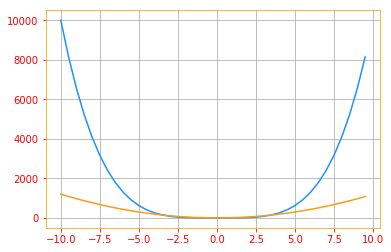

In [12]:
# Plot where second derivative is positive

x0 = tf.range(-10., 10., .5)
x = tf.Variable(x0)

def f(x): 
    return (tf.pow(x, 4))

def second_derivative(x):
    with tf.GradientTape() as t:
        with tf.GradientTape() as t2:
            out = f(x)
        dy_dx = t2.gradient(out, x)
    d2y_dx2 = t.gradient(dy_dx, x)
    return d2y_dx2

# Original Function f(x): x^4
plt.plot(x0, f(x0), color='dodgerblue')

# Second Derivative of f(x)
d3 = second_derivative(x)
plt.plot(x0, d3, color='#FF9A13')
plt.grid()

When our function has multiple input dimensions, there are many second derivatives. These derivatives can be collected together into a matrix called the __Hessian matrix__. The Hessian matrix $H (f)(x)$ is defined such that:

$$\color{orange}{H(f)(x)_{i, j} = \frac{\partial^2}{\partial x_i \partial x_j} f(x) \tag{7}}$$

Equivalently, the Hessian is the Jacobian of the gradient. 

If you have been following everything upto now, this should make sense and if it does feel free to skip to the code, but sometimes it's better to recap, so let me explain what Hessian and Jacobian mean and how they are related, starting with the gradients in one dimension, a gradient is simply the slope of a function in a direction, if you have multiple direction (inputs), for each direction there is a different rate of change for each direction and gradient is simply a collection of all of this. Think of throwing a ball, the ball goes further (x direction) and higher (z direction) and if you take the derivative of the directions with respect to time, you get the individual velocities in each direction and the gradient is a matrix of such values. This matrix of gradients is called the Jacobian. Now, let's say you take the derivative of the velocities again, you end up with the acceleration of the ball in each direction (x and z) and this is the Hessian matrix, simple as that.

In [13]:
"""
NOTE: As of 06.14.2019 tf.hessians doesn't work with tf eager mode and the tf.GradientTape doesn't
have a method hessians. There is a bug report open in GitHub 
(https://github.com/tensorflow/tensorflow/issues/29781) so as soon as that is resolved the following
code will work and I will fix this cell.

>>> f = 100*(y - x**2)**2 + (1 - x)**2
>>> x = tf.Variable([1., 1.])

>>> hessian_matrix = tf.hessians(f, x)
>>> print(hessian_matrix)

>>> with tf.GradientTape() as t:
... out = f
>>> hessian = t.hessians(out, x)

But for now, we will look into another way we can get the Hessian using the
equivalency of the Hessian being the gradient of the Jacobian for f(x,y)= x^3 - 2xy + y^6 and for 
points x = 1, y = 2, but note that this will return the sum of each column, the final 
Hessian Matrix will be:

[[ 6., -2.  ],
 [-2., -480.]]

I specifically took this example from Khan academy so if you want to see how the derivation is calculated, 
take a look at: 
(https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian)

"""

def f(x): return tf.pow(x[0], 3) - 2*x[0]*x[1] - tf.pow(x[1], 6)


x = tf.Variable([1., 2.], dtype=tf.float32)

with tf.GradientTape() as h:
    with tf.GradientTape() as g:
        out = f(x)
    jacobian = g.jacobian(out, x)                      # Calls the Jacobian method
hessian = h.gradient(jacobian, x)                      # We take the gradient of the Jacobian to get the Hessian Matrix
    
print("Jacobian: \n{} \nHessian: \n{}".format(jacobian, hessian))

Jacobian: 
[  -1. -194.] 
Hessian: 
[   4. -482.]


Anywhere that the second partial derivatives are continuous, the differential
operators are commutative, this implies that:

$$\color{orange}{H_{i, j} = H_{j, i} \tag{8}}$$

so the Hessian matrix is symmetric at such points.

Most of the functions we encounter in the context of deep learning have a symmetric Hessian almost everywhere. Because the Hessian matrix is real and symmetric, we can decompose it into a set of real eigenvalues and an orthogonal basis of eigenvectors. If you don't recall Eigenvalues and Eigenvectors, I strongly suggest you review [Eigendecomposition](https://www.adhiraiyan.org/deeplearning/02.00-Linear-Algebra#7). But for the sake of completion, the eigenvectors of matrix M  are vectors that do not change direction when multiplied with M , and the eigenvalues represent the change in length of the eigenvector when multiplied with M .

The second derivative in a specific direction represented by a unit vector $d$ is given by $d^{\top} H d$. When $d$ is the eigenvector of $H$, the second derivative in that direction is given by the corresponding eigenvalue. For other directions of $d$, the directional second derivative is a weighted average of all the eigenvalues, with weights between 0 and 1, and eigenvectors that have a smaller angle with $d$ receiving more weight. The maximum eigenvalue determines the maximum second derivative, and the minimum eigenvalue determines the minimum second derivative. 

In [14]:
# Eigenvalue and Eigenvectors for the Hessian matrix

hessian = tf.constant([[ 6., -2.], [-2., -480.]])
eigenvalues, eigenvectors = tf.linalg.eigh(hessian)

print("Eigenvalue for the Hessian: \n{} \n\nEigenvectors for the Hessian: \n{}".format(eigenvalues, eigenvectors))

Eigenvalue for the Hessian: 
[-480.00824    6.00823] 

Eigenvectors for the Hessian: 
[[ 0.00411512 -0.99999154]
 [ 0.99999154  0.00411512]]


The (directional) second derivative tells us how well we can expect a gradient
descent step to perform. We can make a second-order Taylor series approximation to the function $f(x)$ around the current point $x^{(0)}$ and if we use a learning rate of $\epsilon$, then the new point $x$ will be given by $x^{(0)} - \epsilon g$ which gives:

$$\color{orange}{f(x^{(0)} - \epsilon g) \approx f(x^{(0)}) - \epsilon g^{\top}g + \frac{1}{2} \epsilon^2 g^{\top} Hg \tag{9}}$$

I know, that looks complicated, let me explain. There are three terms here: the original value of the function, the expected improvement due to the slope of the function, and the correction we must apply to account for the curvature of the function. What you need to know is:

- When this last term is too large, the gradient descent step can actually move uphill.

- When it is zero or negative, the Taylor series approximation predicts that increasing $\epsilon$ forever will decrease $f$ forever.

Take a look at the image below. The graph on the left, which is the first derivative of a one dimensional function and the graph on the right is the second derivative of the same function.

![Hessian derivative directions](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0403e.png)

In the left diagram, the slope changes a lot, while it is more stable in the right diagram. As you can see, the rate of change of the slope corresponds to how “curved” each loss function is. The sharper the curve, the more rapidly the slope changes.


In multiple dimensions, we need to examine all the second derivatives of the function. Using the eigendecomposition of the Hessian matrix, we can generalize the second derivative test to multiple dimensions. At a critical point, where $\nabla_x f(x) = 0$, we can examine the eigenvalues of the Hessian to determine whether the critical point is a local maximum, local minimum, or saddle point. 

- When the Hessian is positive definite (all its eigenvalues are positive), the point is a local minima.

- When the Hessian is negative definite (all its eigenvalues are negative), the point is a local maximum.

- When all the nonzero eigenvalues have the same sign but atleast one eigenvalue is zero, the derivative test can be inconclusive, like the univariate second derivative test.


In multiple dimensions, there is a different second derivative for each direction at a single point. The condition number of the Hessian at this point measures how much the second derivatives differ from each other. When the Hessian has a poor condition number, gradient descent performs poorly. This is because in one direction, the derivative increases rapidly, while in another direction, it increases slowly.  Gradient descent is unaware of this change in the derivative, so it does not know that it needs to explore preferentially in the direction where the derivative remains negative for longer. Poor condition number also makes choosing a good step size difficult. The step size must be small enough to avoid overshooting the minimum and going uphill in directions with strong positive curvature. This usually means that the step size is too small to make significant progress in other directions with less curvature. 

This issue can be resolved by using information from the Hessian matrix to guide the search. The simplest method for doing so is known as __Newton’s method__. Newton’s method is based on using a second-order Taylor series expansion to approximate $f(x)$ near some point $x^{(0)}$ and by solving for the critical point, we obtain:

$$\color{orange}{x^* = x^{(0)} - H(f)(x^{(0)})^{-1} \ \nabla_x f(x^{(0)}) \tag{10}}$$

- When $f$ is positive definite quadratic function, Newton's method consists of applying the above equation once to jump to the minimum of the function directly.

- When $f$ is not truly quadratic but can be locally approximated as a positive definite quadratic, Newton’s method consists of applying the above equation multiple times. 

Iteratively updating the approximation and jumping to the minimum of the approximation can reach the critical point much faster than gradient descent would. This is a useful property near a local minimum, but it can be a harmful property near a saddle point. 


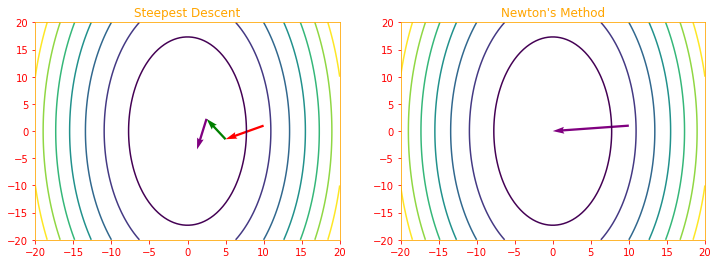

In [15]:
"""
Let's see how Newton's method can be used to solve a quadratic function by applying it once.
We start with a quadratic function x^2 + 5y^2 and when you differentiate it, you end up with 2x + 10y
which would result in a Hessian of [[2 0], [0, 10]] because the derivative of 2x + 10y is 2 and 10.
"""

def quad(x):
    return ((x[1:])**2.0 + 5*(x[:-1])**2.0)

def quad_grad(x,y):
    return (tf.Variable([2.0*x, 10.0*y]))


# Create x and y values
x = tf.linspace(-20.0, 20.0, 100)
y = tf.linspace(-20.0, 20.0, 100)

# Broadcasts parameters for evaluation on an N-D grid
X, Y = tf.meshgrid(x, y)

# Reshape X and Y to pack along first dim (row wise) and apply the quadratic function and reshape it to get the original dimension
Z = tf.reshape(quad(tf.stack([tf.reshape(X, [10000,]), tf.reshape(Y, [10000,])], axis=0)), [100, 100])

# Take the inverse of the Hessian: (1/2, 1/10)
H_inv = - tf.constant([[0.5, 0], [0, 0.1]])

plt.figure(figsize=(12,4))
plt.subplot(121)

plt.contour(X,Y,Z);
plt.title("Steepest Descent");
step = -0.25
X0 = 10.0
Y0 = 1.0

# Here we calculate the Gradient of our function and take the dot product between the gradient and the Hessian inverse
N_grad = tf.tensordot(H_inv, quad_grad(X0,Y0), axes=1)

sgrad = step*quad_grad(X0,Y0)
plt.quiver(X0, Y0, sgrad[0], sgrad[1], color='red',angles='xy',scale_units='xy',scale=1);
X1 = X0 + sgrad[0]
Y1 = Y0 + sgrad[1]

sgrad = step*quad_grad(X1,Y1)
plt.quiver(X1.numpy(), Y1.numpy(), sgrad[0].numpy(), sgrad[1].numpy(), color='green', angles='xy', scale_units='xy', scale=1);
X2 = X1 + sgrad[0]
Y2 = Y1 + sgrad[1]

sgrad = step*quad_grad(X2,Y2)
plt.quiver(X2.numpy(), Y2.numpy(), sgrad[0].numpy(), sgrad[1].numpy(), color='purple',angles='xy',scale_units='xy',scale=1);


plt.subplot(122)
plt.contour(X,Y,Z);
plt.title("Newton's Method")
plt.quiver(X0, Y0, N_grad[0], N_grad[1], color='purple',angles='xy',scale_units='xy',scale=1);



Optimization algorithms that use only the gradient, such as gradient descent, are called __first-order optimization algorithms__. Optimization algorithms that also use the Hessian matrix, such as Newton’s method, are called __second-order optimization algorithms__.

Deep learning algorithms tend to lack guarantees because the family of functions used in deep learning is quite complicated. But sometimes we gain some guarantees by restricting ourselves to functions that are either __Lipschitz continuous__ or have Lipschitz continuous derivatives. A Lipschitz function is a function $f$ whose rate of change is bounded by a __Lipschitz constant__ $\mathcal{L}$:

$$\color{orange}{\forall x, \forall y, |f(x) - f(y)| \leq \mathcal{L} \| x - y \|_2 \tag{11}}$$

This property is useful because it enables us to quantify our assumption that a small change in the input made by an algorithm such as gradient descent will have a small change in the output. 

# 04.04 - Constrained Optimization

Sometimes we may wish to find the maximal or minimal value of $f(x)$ for values of $x$ in some set $\mathbb{S}$. This is knows as __constrained optimization__. Points that lie within the set $\mathbb{S}$ are called __feasible__ points in constrained optimization technology.

We often wish to find a solution that is small in some sense. A common approach in such situations is to impose a norm constraint, such as $\| x \| \leq 1$. One simple approach to constrained optimization is simply to modify gradient descent taking the constraint into account.


A more sophisticated approach is to design a different, unconstrained optimization problem whose solution can be converted into a solution to the original, constrained optimization problem. This approach requires creativity; the transformation between optimization problems must be designed specifically for each case we encounter.

The __Karush–Kuhn–Tucker (KKT)__ approach provides a very general
solution to constrained optimization. With the KKT approach, we introduce
a new function called the __generalized Lagrangian__ or __generalized Lagrange function__.

To define the Lagrangian, we first need to describe $\mathbb{S}$ in terms of equations and inequalities. We want a description of $\mathbb{S}$ in terms of m functions $g^{(i)}$ and $n$ functions $h^{(j)}$ so that $\mathbb{S} = \{ x \  \mid \ \forall i, g^{(i)} (x) = 0 \ \text{and} \ \forall j, h^{(j)} (x) \leq o) \}$. The equations involving $g^{(i)}$ are called __equality constraints__, and the inequalities involving $h^{(j)}$ are called __inequality constraints__.

We introduce new variables $\lambda_i$ and $\alpha_j$ for each constraint, these are called the KKT multipliers. The generalized Lagrangian is then defined as:

$$\color{orange}{L(x, \lambda, \alpha) = f(x) + \displaystyle\sum_i \lambda_i g^{(i)} (x) + \displaystyle\sum_j \alpha_j h^{(j)} (x) \tag{12}}$$

We can now solve a constrained minimization problem using unconstrained optimization of the generalized Lagrangian. As long as at least one feasible point exists and $f(x)$ is not permitted to have $\infty$.

[0, 3, 0, 3]

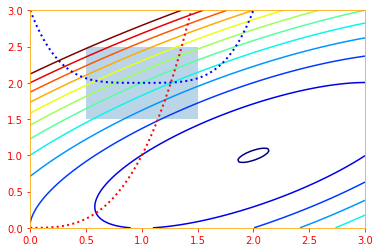

In [16]:
"""
Let's see how this looks by plotting a function f(x) = −(2xy+2x−x^2−2y^2) with constraints 
x^3−y = 0 and y−(x−1)^4−2≥ 0 with bounds 0.5, 1.5, 1.5, 2.5. The solution will be where the
two constraints meet inside the bound.
"""

def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=2, color='r')                   # constraint 1: x^3−y = 0
plt.plot(x, (x-1)**4+2, 'k:', linewidth=2, color='b')             # constraint 2: y−(x−1)^4−2≥ 0
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)         # bounds 0.5, 1.5, 1.5, 2.5
plt.axis([0,3,0,3])

To perform constrained maximization, we can construct the generalized
Lagrange function of $- f(x)$, which leads to this optimization problem:

$$\color{orange}{min_x max_{\lambda} max_{\alpha, \alpha \geq 0} = - f(x) + \displaystyle\sum_i \lambda_i g^{(i)} (x) + \displaystyle\sum_j \alpha_j h^{(j)} (x) \tag{13}}$$

The sign of the term for the equality constraints does not matter; we may define it with addition or subtraction as we wish. 

A simple set of properties describe the optimal points of constrained optimization problems. These properties are called the Karush-Kuhn-Tucker (KKT) conditions. They are necessary conditions, but not always sufficient conditions, for a point to be optimal. The conditions are:

- The gradient of the generalized Lagrangian is zero.

- All constraints on both $x$ and the KKT multipliers are satisfied

- The inequality constraints exhibit "complementary slackness": $\alpha \odot h(x) = 0$

# 04.05 - Example: Linear Least Squares

Let's see how we can find the value of $x$ that minimizes:

$$\color{orange}{f(x) = \frac{1}{2} \| Ax - b \|_2^2 \tag{14}}$$

using gradient based optimization.

First we need to obtain the gradient:

$$\color{orange}{\nabla_x f(x) = A^{\top} (Ax - b) = A^{\top} Ax - A^{\top} b \tag{15}}$$

![Linear least squares](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0405a.png)

One can also solve this problem using Newton’s method. In this case, because
the true function is quadratic, the quadratic approximation employed by Newton’s method is exact, and the algorithm converges to the global minimum in a single step.


slope (m): tf.Tensor(1.0573614, shape=(), dtype=float32)
intercept (b): tf.Tensor(-0.27646956, shape=(), dtype=float32)


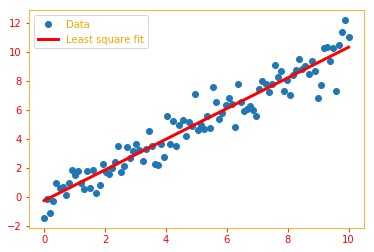

In [17]:
"""
There are two ways to solve the above system. Direct method and iterative method.
We start with the iterative method. The optimal solution is where the gradient becomes zero
therefore it is at x = (A^T b)*(A^T A)^{-1} and this is what we will be calculating
"""

# Generate random x and y data
x_vals = np.linspace(0., 10., 100)
y_vals = x_vals + np.random.normal(loc=0, scale=1, size=100)

x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = tf.ones([100, 1], dtype=tf.float32)

# tensorflow needs its data types in float so we cast the dtypes to float
A_tensor = tf.dtypes.cast(tf.concat([x_vals_column, ones_column], axis=1), tf.float32)
Y_tensor = tf.dtypes.cast(tf.reshape(tf.transpose(y_vals), [100, 1]), tf.float32)

# Iterative method
tA_A = tf.matmul(A_tensor, A_tensor, transpose_a=True)         # We calculate A^T A
tA_A_inv = tf.linalg.inv(tA_A)                                 # And take the inverse of it (A^TA)^{-1}
product = tf.matmul(tA_A_inv, A_tensor, transpose_b=True)      # Then multiply it with A to yield (A^TA)^{-1} A
A_eval = tf.matmul(product, Y_tensor)                          # Finally we find (A^TA)^{-1}*A*b


m_slope = A_eval[0][0]
b_intercept = A_eval[1][0]
print('slope (m): ' + str(m_slope))
print('intercept (b): ' + str(b_intercept))

# Now for each x_val we find the best fit line
best_fit = []
for i in x_vals:
    best_fit.append(m_slope * i + b_intercept)

plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Least square fit', linewidth=3)
plt.legend(loc='upper left')
plt.show()

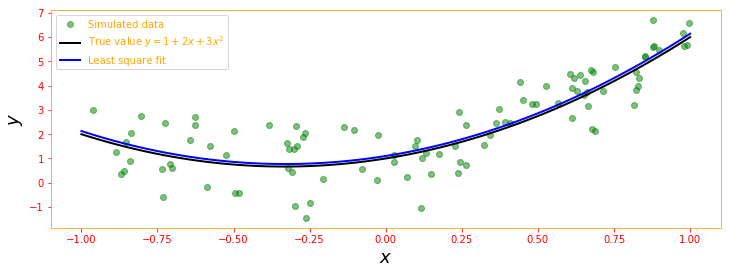

In [18]:
"""
Next, we try the direct method for another dataset using tensorflows least squares class for function
f(x) = 1 + 2x + 3x^2
"""

# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data points
m = 100
X = 1 - 2 * np.random.rand(m)
Y = tf.reshape(tf.convert_to_tensor(a + b * X + c * X**2 + np.random.randn(m)), [100, 1])
A = tf.stack([X**0, X**1, X**2], axis=1)

# Solving directly using tensorflow's least sqaures. 
sol = tf.linalg.lstsq(A, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

Now, suppose we wish to minimize the same function, but subject to the constraint $x^{\top} x \leq 1$. To do so, we introduce the Lagrangian:

$$\color{orange}{L(x, \lambda) = f(x) + \lambda (x^{\top} x - 1) \tag{16}}$$

We can now solve the problem:

$$\color{orange}{min_x max_{\lambda, \lambda \geq 0} L(x, \lambda) \tag{17}}$$



In [19]:
"""
Let' take an example: Maximize f(x,y,z)=xy+yz subject to the constraints x+2y=6 and x−3z=0.
We start by setting up the equation:

F(x,y,z,λ,α) = xy + yz − λ(x+2y−6) + α(x-3z)

Now set the partial derivatives to zero and solve the following set of equations:

y − λ − α = 0
x + z − 2λ = 0
y + 3α = 0
x + 2y −6 = 0
x − 3z = 0

which is a linear equation in  x,y,z,λ,μ, Now this can be put into the matrix equation:

[0, 1, 0, -1, -1] [x] = [0]
[1, 0, 1, -2,  0] [y] = [0]
[0, 1, 0,  0,  3] [z] = [0]
[1, 2, 0,  0,  0] [λ] = [6]
[1, 0,-3,  0,  0] [μ] = [0]

"""

matrix = tf.constant([
    [0, 1, 0, -1, -1],
    [1, 0, 1, -2, 0],
    [0, 1, 0, 0, 3],
    [1, 2, 0, 0, 0],
    [1, 0,-3, 0, 0]], dtype=tf.float32)

rhs = tf.constant([[0],[0],[0],[6],[0]], dtype=tf.float32)
solve = tf.linalg.solve(matrix, rhs)

print("Solving the constrained optimization using Lagrange multipliers yield x: \n{}".format(solve))

Solving the constrained optimization using Lagrange multipliers yield x: 
[[ 3. ]
 [ 1.5]
 [ 1. ]
 [ 2. ]
 [-0.5]]


The smallest norm solution to the unconstrained least squares problem may be found using the Moore-Penrose pseudoinverse: $x = A^+ b$. If this point is feasible, then it is the solution to the constrained problem.

In [20]:
# Moore-penrose pseudoinverse solution to the above problem
mpp_solution = tfp.math.pinv(matrix)

print(mpp_solution)

Instructions for updating:
tfp.math.pinv is deprecated. Use tf.linalg.pinv instead
tf.Tensor(
[[-0.7500001   0.3750001  -0.2500001   0.50000006  0.12499998]
 [ 0.375      -0.18750006  0.12500001  0.25       -0.06249993]
 [-0.25        0.12500006 -0.08333342  0.16666669 -0.29166663]
 [-0.5        -0.25       -0.16666667  0.33333343 -0.08333325]
 [-0.12500004  0.06249994  0.2916666  -0.08333326  0.02083334]], shape=(5, 5), dtype=float32)


If the Moore-Penrose pseudoinverse solution is not feasible, we find the solution where the constraint is active by differetiating the Lagrangian with respect to $x$ and solving for $x$, we obtain:

$$\color{orange}{x = (A^{\top} A + 2 \lambda I)^{-1} A^{\top} b \tag{18}}$$

We can then find the magnitude of $\lambda$ by performing gradient ascent using:

$$\color{orange}{\frac{\partial}{\partial \lambda} L(x, \lambda) = x^{\top} x - 1 \tag{19}}$$

When the norm of $x$ exceeds 1, this derivative is positive, so to follow the derivative uphill and increase the Lagrangian with respect to $\lambda$, we increase $\lambda$. Because the coefficient on the $x^{\top} x$ penatly has increased, solving the linear equation for $x$ will now yield a solution with a smaller norm. The process of solving the linear equation and adjusting $\lambda$ continues until $x$ has the correct norm and the derivative on $\lambda$ is 0.



# 💫 Congratulations

You have successfully completed Chapter 4 Numerical Computation of [Deep Learning with Tensorflow 2.0](https://www.adhiraiyan.org/DeepLearningWithTensorflow.html). To recap, we went through the following concepts:

- Numerical Computation
- Overflow and Underflow
- Poor Conditioning
- Gradient Based Optimization
- Constrained Optimization
- Example: Linear Least Squares


If you like to read more about Numerical Computation take a look at [Numerical Methods
for Engineers by Steven C. Chapra](http://mechfamilyhu.net/download/uploads/mech144232415981.pdf) or [Numerical Methods for
Computational Science and Engineering by Prof. R. Hiptmair](http://www.sam.math.ethz.ch/~hiptmair/tmp/NumCSE/NumCSE15.pdf). 

This concludes the mathematical preliminaries that we use to develop machine learning algorithms. We are now ready to build and analyze some full-fledged machine learning systems. I am excited, are you 😍.

<!--NAVIGATION-->
< [03.00 - Probability and Information Theory](03.00-Probability-and-Information-Theory.ipynb) | [Contents](Index.ipynb) |

<a href="https://colab.research.google.com/github/adhiraiyan/DeepLearningWithTF2.0/blob/master/notebooks/04.00-Numerical-Computation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
